In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mleam.data_prep import preprocessed_dataset_from_json, fcc_bulk_curve
from mleam.models.eam_models import SMATB, SuttonChen, FinnisSinclair

2024-08-26 10:32:52.692724: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-26 10:32:52.694395: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 10:32:52.717121: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 10:32:52.717155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 10:32:52.717180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
atom_types = ["Ni", "Pt"]
type_dict = {"Ni": 0, "Pt": 1}

data_sets = {
    "Ni13": preprocessed_dataset_from_json(
        "../data/NiNi_ico13_curve.json", type_dict=type_dict
    ),
    "Ni12Pt1": preprocessed_dataset_from_json(
        "../data/PtNi_ico13_curve.json", type_dict=type_dict
    ),
    "Ni1Pt12": preprocessed_dataset_from_json(
        "../data/NiPt_ico13_curve.json", type_dict=type_dict
    ),
    "Pt13": preprocessed_dataset_from_json(
        "../data/PtPt_ico13_curve.json", type_dict=type_dict
    ),
}

In [3]:
defaults = {
    ("r0", "NiNi"): 2.491,
    ("cut_a", "NiNi"): 4.982,
    ("cut_b", "NiNi"): 5.57,
    ("r0", "NiPt"): 2.633,
    ("cut_a", "NiPt"): 5.266,
    ("cut_b", "NiPt"): 5.887567,
    ("r0", "PtPt"): 2.775,
    ("cut_a", "PtPt"): 5.55,
    ("cut_b", "PtPt"): 6.2050886,
}

smatb_params = {
    **defaults,
    ("A", "NiNi"): 0.0845,  # 0.07715,
    ("A", "NiPt"): 0.1346,  # 0.16844,
    ("A", "PtPt"): 0.1602,  # 0.17612,
    ("p", "NiNi"): 11.73,  # 12.542,
    ("p", "NiPt"): 14.838,  # 13.953,
    ("p", "PtPt"): 13.00,  # 12.924,
    ("xi", "NiNi"): 1.405,  # 1.4962,
    ("xi", "NiPt"): 2.3338,  # 1.9978,
    ("xi", "PtPt"): 2.1855,  # 2.0953,
    ("q", "NiNi"): 1.93,  # 2.0644,
    ("q", "NiPt"): 3.036,  # 3.9377,
    ("q", "PtPt"): 3.13,  # 3.2579,
}

sutton_chen_params = {
    **defaults,
    ("n", "NiNi"): 9,
    ("m", "NiNi"): 6,
    ("c", "NiNi"): 3.52 * (1.5707e-2) ** (1 / 9),
    ("a", "NiNi"): 3.52 * (1.5707e-2 * 39.432) ** (2 / 6),
    ("n", "NiPt"): 10,
    ("m", "NiPt"): 7,
    ("c", "NiPt"): 3.72 * (1.7770e-2) ** (1 / 10),
    ("a", "NiPt"): 3.72 * (1.7770e-2 * 36.92) ** (2 / 7),
    ("n", "PtPt"): 10,
    ("m", "PtPt"): 8,
    ("c", "PtPt"): 3.92 * (1.9833e-2) ** (1 / 10),
    ("a", "PtPt"): 3.92 * (1.9833e-2 * 34.408) ** (2 / 8),
}

finnis_sinclair_params = {
    **defaults,
    ("d", "NiNi"): 3.69,
    ("A", "NiNi"): 1.3**2,
    ("beta", "NiNi"): 0.0,
    ("c", "NiNi"): 2.7,
    ("c0", "NiNi"): 47,
    ("c1", "NiNi"): -33,
    ("c2", "NiNi"): 6.0,
    ("d", "NiPt"): 4.0,
    ("A", "NiPt"): 1.3**2,
    ("beta", "NiPt"): 0.0,
    ("c", "NiPt"): 3.0,
    ("c0", "NiPt"): 47,
    ("c1", "NiPt"): -33,
    ("c2", "NiPt"): 6.0,
    ("d", "PtPt"): 4.400,
    ("A", "PtPt"): 1.3**2,
    ("beta", "PtPt"): 0.0,
    ("c", "PtPt"): 3.25,
    ("c0", "PtPt"): 47.1349,
    ("c1", "PtPt"): -33.767,
    ("c2", "PtPt"): 6.254,
}

model_kwargs = {"preprocessed_input": True}
models = {
    "SMATB": SMATB(atom_types, params=smatb_params, **model_kwargs),
    "SuttonChen": SuttonChen(atom_types, params=sutton_chen_params, **model_kwargs),
    "FinnisSinclair": FinnisSinclair(
        atom_types, params=finnis_sinclair_params, **model_kwargs
    ),
}


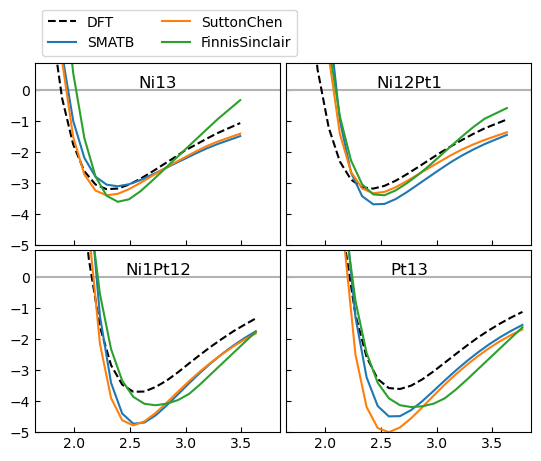

In [4]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=2,
    sharex=True,
    sharey=True,
    gridspec_kw=dict(hspace=0.025, wspace=0.025),
)
axes = axes.flatten()

for ax, (name, data) in zip(axes, data_sets.items()):
    x, y = next(iter(data))
    r_vec = x["distances"].to_tensor()[:, 0, 0, 0]
    e_dft = y["energy_per_atom"]

    ax.axhline(0, color="0.7")

    ax.plot(r_vec, e_dft, "k--", label="DFT")

    ax.set_title(name, y=0.82)
    ax.tick_params(direction="in")

    for m_name, model in models.items():
        e_model = model.predict(data, verbose=0)["energy_per_atom"]
        ax.plot(r_vec, e_model, label=m_name)


ax.set_xlim(1.65, 3.85)
ax.set_ylim(-5, 0.9)
axes[0].legend(loc="lower left", bbox_to_anchor=(0, 1.0), ncols=2)


# Bulk curves

In [5]:
a_vec = np.linspace(1.8 * np.sqrt(2), 3.5 * np.sqrt(2))
Ni_bulk_curve = fcc_bulk_curve(type_dict, "Ni", a=a_vec)
Pt_bulk_curve = fcc_bulk_curve(type_dict, "Pt", a=a_vec)

bulk_curve_ref = {}
for atom_type in ["Ni", "Pt"]:
    with open(f"../data/{atom_type}_bulk_curve.json") as fin:
        bulk_curve_ref[atom_type] = json.load(fin)


1/1 [==============================] - 0s 12ms/step


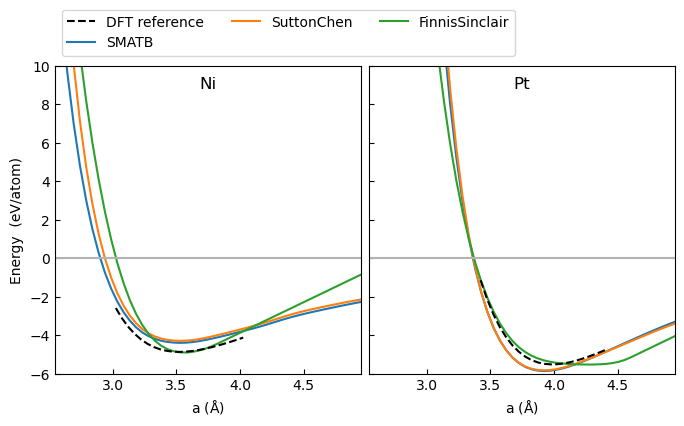

In [6]:
fig, axes = plt.subplots(
    figsize=(8, 4), ncols=2, sharex=True, sharey=True, gridspec_kw={"wspace": 0.025}
)
for ax, (atom_type, bulk_curve) in zip(
    axes, [("Ni", Ni_bulk_curve), ("Pt", Pt_bulk_curve)]
):
    ax.plot(
        bulk_curve_ref[atom_type]["a"],
        bulk_curve_ref[atom_type]["e_dft_bond"],
        "k--",
        label="DFT reference",
        zorder=100,
    )
    for m_name, model in models.items():
        ax.plot(a_vec, model.predict(bulk_curve)["energy_per_atom"], label=m_name)

    ax.axhline(0, color="0.7")
    ax.set_ylim(-6, 10)
    ax.set_xlim(a_vec.min(), a_vec.max())
    ax.set_xlabel("a ($\mathrm{\AA}$)")

    ax.set_title(atom_type, y=0.9)
    ax.tick_params(direction="in")

axes[0].set_ylabel("Energy  (eV/atom)")
axes[0].legend(
    loc="lower left", bbox_to_anchor=(0, 1.01), ncols=(len(models) + 1) // 2 + 1
)